In [ ]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, MaxPooling2D, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train_orig), (x_test, y_test_orig) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train_orig, num_classes)
y_test = to_categorical(y_test_orig, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


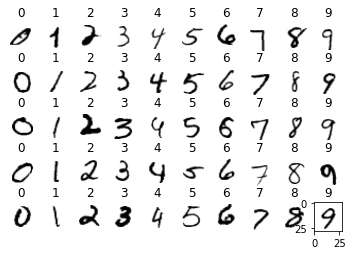

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#image_index = 7
for i in range(10):
  num_digits=5
  indices=np.random.choice(np.where(y_train_orig==i)[0],num_digits)
  for j in range(num_digits):
    plt.axis('off')
    plt.subplot(num_digits,10,10*j+i+1).set_title('{}'.format(i))
    plt.imshow(x_train[indices[j],:,:,0], cmap='Greys')
plt.show()

In [ ]:
indexes = np.random.permutation(len(x_train))
train_data = x_train[indexes]
train_labels = y_train[indexes]

val_count = int(0.1 * len(x_train))
x_val = train_data[:val_count,:]
y_val = train_labels[:val_count,:]

# leave rest in training set
part_x_train = train_data[val_count:,:]
part_y_train = train_labels[val_count:,:]

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
#add new dense
#example
model.add(Dense(512, activation='tanh')) #relu elu
tf.keras.layers.Conv2D(64, (3,3), activation='relu')
model.add(Dense(216, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd', #change
              metrics=['accuracy'])

history=model.fit(part_x_train, part_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
422/422 [==============================] - 5s 12ms/step - loss: 0.8500 - accuracy: 0.7931 - val_loss: 0.5001 - val_accuracy: 0.8708
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.4446 - accuracy: 0.8803 - val_loss: 0.3903 - val_accuracy: 0.8912
Epoch 3/10
422/422 [==============================] - 5s 11ms/step - loss: 0.3792 - accuracy: 0.8943 - val_loss: 0.3462 - val_accuracy: 0.9012
Epoch 4/10
422/422 [==============================] - 8s 20ms/step - loss: 0.3474 - accuracy: 0.9020 - val_loss: 0.3223 - val_accuracy: 0.9055
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.3271 - accuracy: 0.9068 - val_loss: 0.3038 - val_accuracy: 0.9112
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.3125 - accuracy: 0.9108 - val_loss: 0.2906 - val_accuracy: 0.9145
Epoch 7/10
422/422 [==============================] - 5s 11ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2803 - val_accuracy: 0.9183

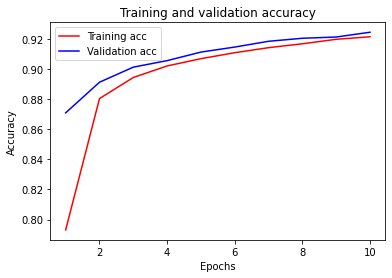

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2626003623008728
Test accuracy: 0.9229000210762024
